## Decision Tree
- It can be used to solve both types of problems i.e., Classification and Regression
- We always create decision tree in top-to-bottom approach

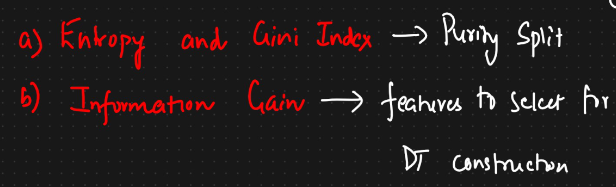

### Decision Tree Classifier
- There are mainly two types:
    - **ID3:** Whenever we create a decision tree, will may have more than binary splits
    - **CART:** currently the sklearn library uses this CART technique. In CART, whenever we create a decision tree, will create **"Binary splits"** with respect to each node